# Web Scraping

* **Goal:** Extract World of Warcraft Classic cooking recipes for more convenient filtering by level learned.

In [105]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
url = "https://wow.gamepedia.com/Classic_Cooking_Recipes"

page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

In [31]:
main_content = soup.find("div", {"id": "mw-content-text"})
tables = main_content.find_all("table", {"class": "sortable"})

#### Process HTML

In [92]:
content = []
row_content = []
headers = []

for header in tables[0].find_all("th"):
    headers.append(header.text.rstrip())

for table in tables:
    row_counter = 0
    for row in table.find_all("tr"):
        
        if row_counter > 0:
            row_content = []
            for entry in row.find_all("td"):
                row_content.append(entry.text.replace("[","").replace("]","").replace("*","").rstrip())
            content.append(row_content)
        row_counter += 1

In [93]:
recipes_df = pd.DataFrame(content, columns=headers)

In [94]:
recipes_df.head(10)

,Learn,Yellow,Green,Grey,Recipe,Source
0,0,,,,Apprentice Cooking,"Trainer, for 95."
1,0,,,,Basic Campfire,"Trainer, for free (instantly learned upon obta..."
2,0,45,65,85,Charred Wolf Meat,"Trainer, for free (instantly learned upon obta..."
3,0,45,65,85,Herb Baked Egg,"Trainer, for free (instantly learned upon obta..."
4,0,45,65,85,Roasted Boar Meat,"Trainer, for free (instantly learned upon obta..."
5,1,30,32,35,Sliced Peaches,"Trainer, for 1."
6,1,30,35,40,Spice Bread,"Trainer, for 10."
7,1,30,35,40,Bread of the Dead,Recipe: Bread of the Dead sold by Chapman lo...
8,1,45,65,85,Brilliant Smallfish,Recipe: Brilliant Smallfish sold by various v...
9,1,45,65,85,Crispy Bat Wing,Recipe: Crispy Bat Wing sold by Abigail Shie...


In [117]:
recipes_df.sample(10)

,Learn,Yellow,Green,Grey,Recipe,Source
79,175.0,215.0,235.0,255.0,Roast Raptor,Recipe: Roast Raptor sold by various vendors ...
121,300.0,330.0,332.0,335.0,Fish Cake,"Trainer, for 50."
32,50.0,90.0,110.0,130.0,Loch Frenzy Delight,Recipe: Loch Frenzy Delight sold by Khara De...
94,225.0,250.0,262.0,275.0,Tender Wolf Steak,Recipe: Tender Wolf Steak sold by Dirge Quik...
51,100.0,100.0,105.0,110.0,Captain Rumsey's Lager,"Recipe: Captain Rumsey's Lager, a possible dr..."
95,225.0,250.0,262.0,275.0,Undermine Clam Chowder,"Recipe: Undermine Clam Chowder sold by ""Chef..."
24,40.0,80.0,100.0,120.0,Smoked Bear Meat,Recipe: Smoked Bear Meat sold by Drac Roughc...
84,200.0,225.0,237.0,250.0,Dragonbreath Chili,Recipe: Dragonbreath Chili sold by Super-Sel...
34,50.0,90.0,110.0,130.0,Rainbow Fin Albacore,Recipe: Rainbow Fin Albacore sold by various ...
33,50.0,90.0,110.0,130.0,Longjaw Mud Snapper,Recipe: Longjaw Mud Snapper sold by various v...


#### Replace missing values with Na

In [100]:
recipes_df = recipes_df.replace(r'^\s*$', np.nan, regex=True)

#### Update data types

In [95]:
recipes_df.dtypes

Learn     object
Yellow    object
Green     object
Grey      object
Recipe    object
Source    object
dtype: object

In [102]:
recipes_df =recipes_df.astype({"Learn": "float64", "Yellow": "float64", "Green": "float64", "Grey": "float64"})
recipes_df.dtypes

Learn     float64
Yellow    float64
Green     float64
Grey      float64
Recipe     object
Source     object
dtype: object

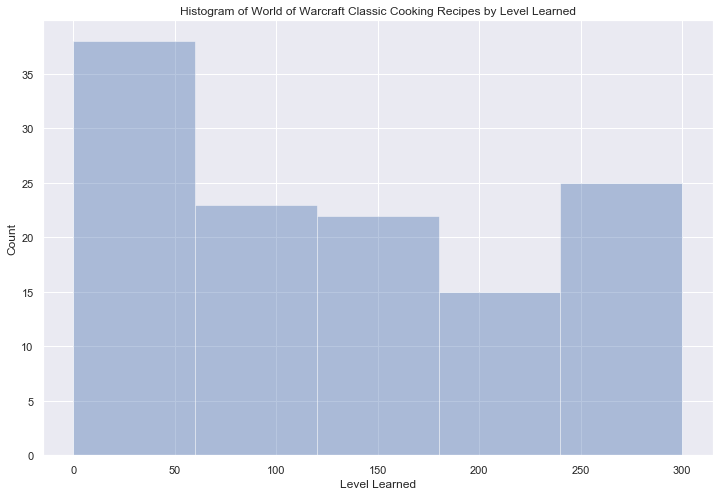

In [115]:
sns.set()
fig = plt.figure(figsize=(12,8))
sns.distplot(recipes_df["Learn"], kde=False)
plt.title("Histogram of World of Warcraft Classic Cooking Recipes by Level Learned")
plt.xlabel("Level Learned")
plt.ylabel("Count")
plt.show()